# 1. Introduction
This analysis aims to explore a dataset containing approximately 50000 records about income of adults. This document is divided into 3 sections:

1. **Introduction**, where the investigation problem is set and the dataset is described; 
2. **Exploratory Data Analysis**, in which we clean the data if necessary, and then develop an understanding of the data; 
3. **Conclusion**, where we communicate our findings. 

Those readers not interested in the whole data analysis process may read Section 1, to get familiar with the data and the investigation problem and then jump directly to Section 3 to find a digest of the key results.

**Table of Contents**:

1. Introduction
   - 1.1. Requirements
    - 1.2. Data Import
2. Exploratory Data Analysis
    - 2.1. Dataset Structure
    - 2.2. Inspection of Variables
        - 2.2.1. Categorical Variables
        - 2.2.2. Link with Income
        - 2.2.3. Numerical Variables
        - 2.2.4. Link with Income
        - 2.2.5. Links between Categorical and Numerical Variables
3. Conclusion
    - 3.1. Summary of Findings
    - 3.2. Questions to be Answered

##  1.1 Requirements

The code below will load the necessary libraries for this notebook.

In [84]:
import json
import re

def extract_imports_from_ipynb(notebook_path):
    # Load the Jupyter Notebook
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook_content = json.load(f)
    
    # Regular expression to capture import statements
    import_pattern = re.compile(r'^\s*(import|from)\s+([a-zA-Z0-9_]+)')
    
    # Set to store all unique packages/modules
    packages = set()
    
    # Iterate over all cells in the notebook
    for cell in notebook_content['cells']:
        if cell['cell_type'] == 'code':  # Only process code cells
            for line in cell['source']:
                match = import_pattern.match(line.strip())
                if match:
                    # Extract the package/module name
                    packages.add(match.group(2))
    
    return sorted(packages)

def save_to_requirements_txt(packages, output_path='requirements.txt'):
    with open(output_path, 'w') as f:
        for package in packages:
            f.write(f"{package}\n")

# Example usage
notebook_path = '03-IncomeDataEDACHECK2.2.3.ipynb'  # Replace with your notebook path
output_path = 'requirements.txt'       # Output file

required_packages = extract_imports_from_ipynb(notebook_path)
save_to_requirements_txt(required_packages, output_path)

print(f"Requirements saved to {output_path}")

Requirements saved to requirements.txt


In [85]:
import subprocess

# Track if any packages are installed
installations_done = False

# Try to open 'requirements.txt' and read package names
try:
    with open('requirements.txt', 'r') as f:
        print("\nREQUIREMENTS:\n")
        requirements = f.read().splitlines()  # Read package names line by line
        print("\n".join(requirements))

        # For each package in requirements.txt, check if it is installed, and if not, install it
        for package in requirements:
            try:
                # Check if the package is installed by trying to import it
                __import__(package.split('==')[0])  # Get the package name before '==' if version is specified
                print(f"'{package}' is already installed.")
            except ImportError:
                # If the package is not installed, install it using pip
                print(f"'{package}' not found. Installing...")
                subprocess.check_call(['pip', 'install', package])
                installations_done = True  # Mark that an installation has been done

except FileNotFoundError:
    # If the file doesn't exist, generate it using pipreqsnb
    !pipreqsnb --savepath requirements.txt 02-IncomeData.ipynb
    print("'requirements.txt' generated successfully.")

    # Now read the contents of the newly generated file
    with open('requirements.txt', 'r') as f:
        print("\nREQUIREMENTS:\n")
        requirements = f.read().splitlines()
        print("\n".join(requirements))

        # Install the necessary packages
        for package in requirements:
            try:
                __import__(package.split('==')[0])
                print(f"'{package}' is already installed.")
            except ImportError:
                print(f"'{package}' not found. Installing...")
                subprocess.check_call(['pip', 'install', package])
                installations_done = True  # Mark that an installation has been done

# If any installations were done, print a completion message
if installations_done:
    print("\nInstallation of missing packages is complete.")
else:
    print("\nAll required packages were already installed.")



REQUIREMENTS:

json
matplotlib
numpy
pandas
re
seaborn
subprocess
ucimlrepo
'json' is already installed.
'matplotlib' is already installed.
'numpy' is already installed.
'pandas' is already installed.
're' is already installed.
'seaborn' is already installed.
'subprocess' is already installed.
'ucimlrepo' is already installed.

All required packages were already installed.


## 1.2. Data import

We choose to analyse the [Adult dataset](https://archive.ics.uci.edu/dataset/2/adult) (also called [Census Income dataset](https://archive.ics.uci.edu/dataset/20/census+income)). The website gives information on this dataset as follows:

> Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted [...]. Prediction task is to determine whether a person's income is over $50,000 a year.

Information on "the 1994 Census database" was sparse but we found that this refers to the census performed by the United States Census Bureau available [here](https://www.census.gov/programs-surveys/ahs/data/1994.html). To understand the data further, we import it into Python and begin an exploratory data analysis. The import is done below. The code is taken from the UCI ML repository [1], obtained by clicking on the "Import to Python" button. This was accessed 10/10/2024. 


In [86]:
#### This code is taken from the UCI ML Repository, including comments. #####

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

## These comments are our own ##
# Note that the fetch_ucirepo(id=2) downloads the data from the UCI repo and may take 5-10 seconds to load depending on internet connection #

# 2. Exploratory Data Analysis

## 2.1. Dataset Structure

We begin by understanding the structure of the dataset. We look through what variables are included in the data, and inspect these further. In particular, we look at the data types and whether some variables has missing values.

In [87]:
#### This code is taken from the UCI ML Repository, including comments. #####

# metadata
# print(adult.metadata) # Uncomment to view the metadata, including repository URL, abstract, tasks, features etc.

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# variable information
print(adult.variables)

# Basic structure and summary
print("Dataset shape:", X.shape)  # Shape of the dataset

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

The output shows us the 14 variables in the dataset, along with their data types. We have 14 features, which will be used to predict the income. We can also see that the features are grouped in demographics, which can be an interesting source of scientific questions. We summarise this information in the table below, while also providing a brief description of the variables. 


| **Variable**     | **Description**                                             | **Type**    | **Missing Values** |
|------------------|-------------------------------------------------------------|-------------|--------------------|
| `age`            | Age of the individual                                        | Continuous  | No                 |
| `workclass`      | Employment status of the individual (e.g. Private, Local-gov)                         | Categorical | Yes                |
| `fnlwgt`         | Final weight, a synthetic feature (see details below) | Continuous  | No                 |
| `education`      | Highest level of education achieved (e.g. Pre-school, High school, Masters)                       | Categorical | No                 |
| `education-num`  | Numerical encoding of education levels                       | Continuous  | No                 |
| `marital-status` | Marital status of the individual (e.g. Divorced, Never-married)                       | Categorical | No                 |
| `occupation`     | Type of occupation the individual holds (e.g. Tech-support, Craft-repair, Other-service)                   | Categorical | Yes                |
| `relationship`   | Relationship status (e.g., Husband, Not-in-family)           | Categorical | No                 |
| `race`           | Race of the individual                                       | Categorical | No                 |
| `sex`            | Gender of the individual (Male/Female)                       | Categorical | No                 |
| `capital-gain`   | Capital gains earned by the individual                       | Continuous  | No                 |
| `capital-loss`   | Capital losses incurred by the individual                    | Continuous  | No                 |
| `hours-per-week` | Number of hours worked per week                              | Continuous  | No                 |
| `native-country` | Country of origin                                            | Categorical | Yes                |
| `income`         | Income level, whether the individual earns >50K or <=50K     | Categorical | No                 |

Further information on `fnlwgt` was found at [this Kaggle notebook](https://www.kaggle.com/datasets/uciml/adult-census-income). We provide a summary below. 
> Description of fnlwgt (final weight) [adapted from [here](https://www.kaggle.com/datasets/uciml/adult-census-income)]
>
> The weights [...] are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls, based on estimates of the 16+ population, controls for hisphanic origin, and controls by race, age and sex. 
>
> [...] People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the [...] sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

The sentence "People with similar demographic characteristics should have similar weights" tells us that we can take the final weight as a proxy for demographic characteristics.

We see that three variables have missing data and that these are all categorical variables. We look at this in more detail by running the code below.

In [88]:
# Combine X and y into a new DataFrame for analysis
combined_df = X.copy()
combined_df['income'] = y[y.columns[0]]  # Add the Income

# Count missing values per column grouped by income class
missing_counts = combined_df.groupby('income').apply(lambda x: x.isnull().sum())

# Display the overall missing values per column
print("\nMissing values per column:\n", X.isnull().sum())  # Missing values count

# Display missing values in target variable
print("\nMissing values in target variable:\n", y.isnull().sum())  # Missing values count


Missing values per column:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

Missing values in target variable:
 income    0
dtype: int64


We look at the missingness in more detail. We attempt to find the numbers of missing data according to income. However, inspecting the income variable reveals that data cleaning is required. This can be seen from the output of the code below.

In [89]:
# View unique categories of the Income in y
unique_categories = y[y.columns[0]].unique()
print("Unique categories in the Income:")
print(unique_categories)

Unique categories in the Income:
['<=50K' '>50K' '<=50K.' '>50K.']


In [90]:
# Merge the categories by replacing the values using .loc
y.loc[:, y.columns[0]] = y[y.columns[0]].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Show the missing values grouped by income class
missing_counts = X.isnull().groupby(y[y.columns[0]]).sum()

# Display the missing values by income class
print("\nMissing values by income class:\n", missing_counts)



Missing values by income class:
         age  workclass  fnlwgt  education  education-num  marital-status  \
income                                                                     
<=50K     0        889       0          0              0               0   
>50K      0         74       0          0              0               0   

        occupation  relationship  race  sex  capital-gain  capital-loss  \
income                                                                    
<=50K          892             0     0    0             0             0   
>50K            74             0     0    0             0             0   

        hours-per-week  native-country  
income                                  
<=50K                0             200  
>50K                 0              74  


It is clear that the majority of missing values occur for low income individuals. This suggests that the data is **not missing at random**. The missingness is informative, and this can therefore guide our analysis. 

## 2.2. Inspection of Variables

We inspect the variables in this dataset to help us gain a good understanding of it. We begin by inspecting categorical variables and numerical variables separately. We will also consider how they behave according to the income class. We will then look for links between the categorical and numerical variables.

### 2.2.1. Categorical Variables

We begin delving into the categorical variables. Using the categorisation in Section 2.1., we can define the categorical columns and perform the required analyses. We begin by finding the number of categories for each categorical variable. This is displayed in the output of the code block below.


In [91]:
# List of categorical variables based on the column names from the dataset
categorical_columns = [
    'workclass', 'education', 'marital-status', 'occupation', 'relationship', 
    'race', 'sex', 'native-country'
]

# Display the number of unique categories for each categorical variable
for col in categorical_columns:
    print(f'{col}: {X[col].nunique()} categories')

workclass: 9 categories
education: 16 categories
marital-status: 7 categories
occupation: 15 categories
relationship: 6 categories
race: 5 categories
sex: 2 categories
native-country: 42 categories


The number of categories is quite high for `native-country`, at 42. Most of the others have fewer than 10 categories, with only `occupation` and `education` having 15 and 16 categories respectively. We visualise the count by category in the plot below. The counts are sorted in descending order for ease of visualisation.

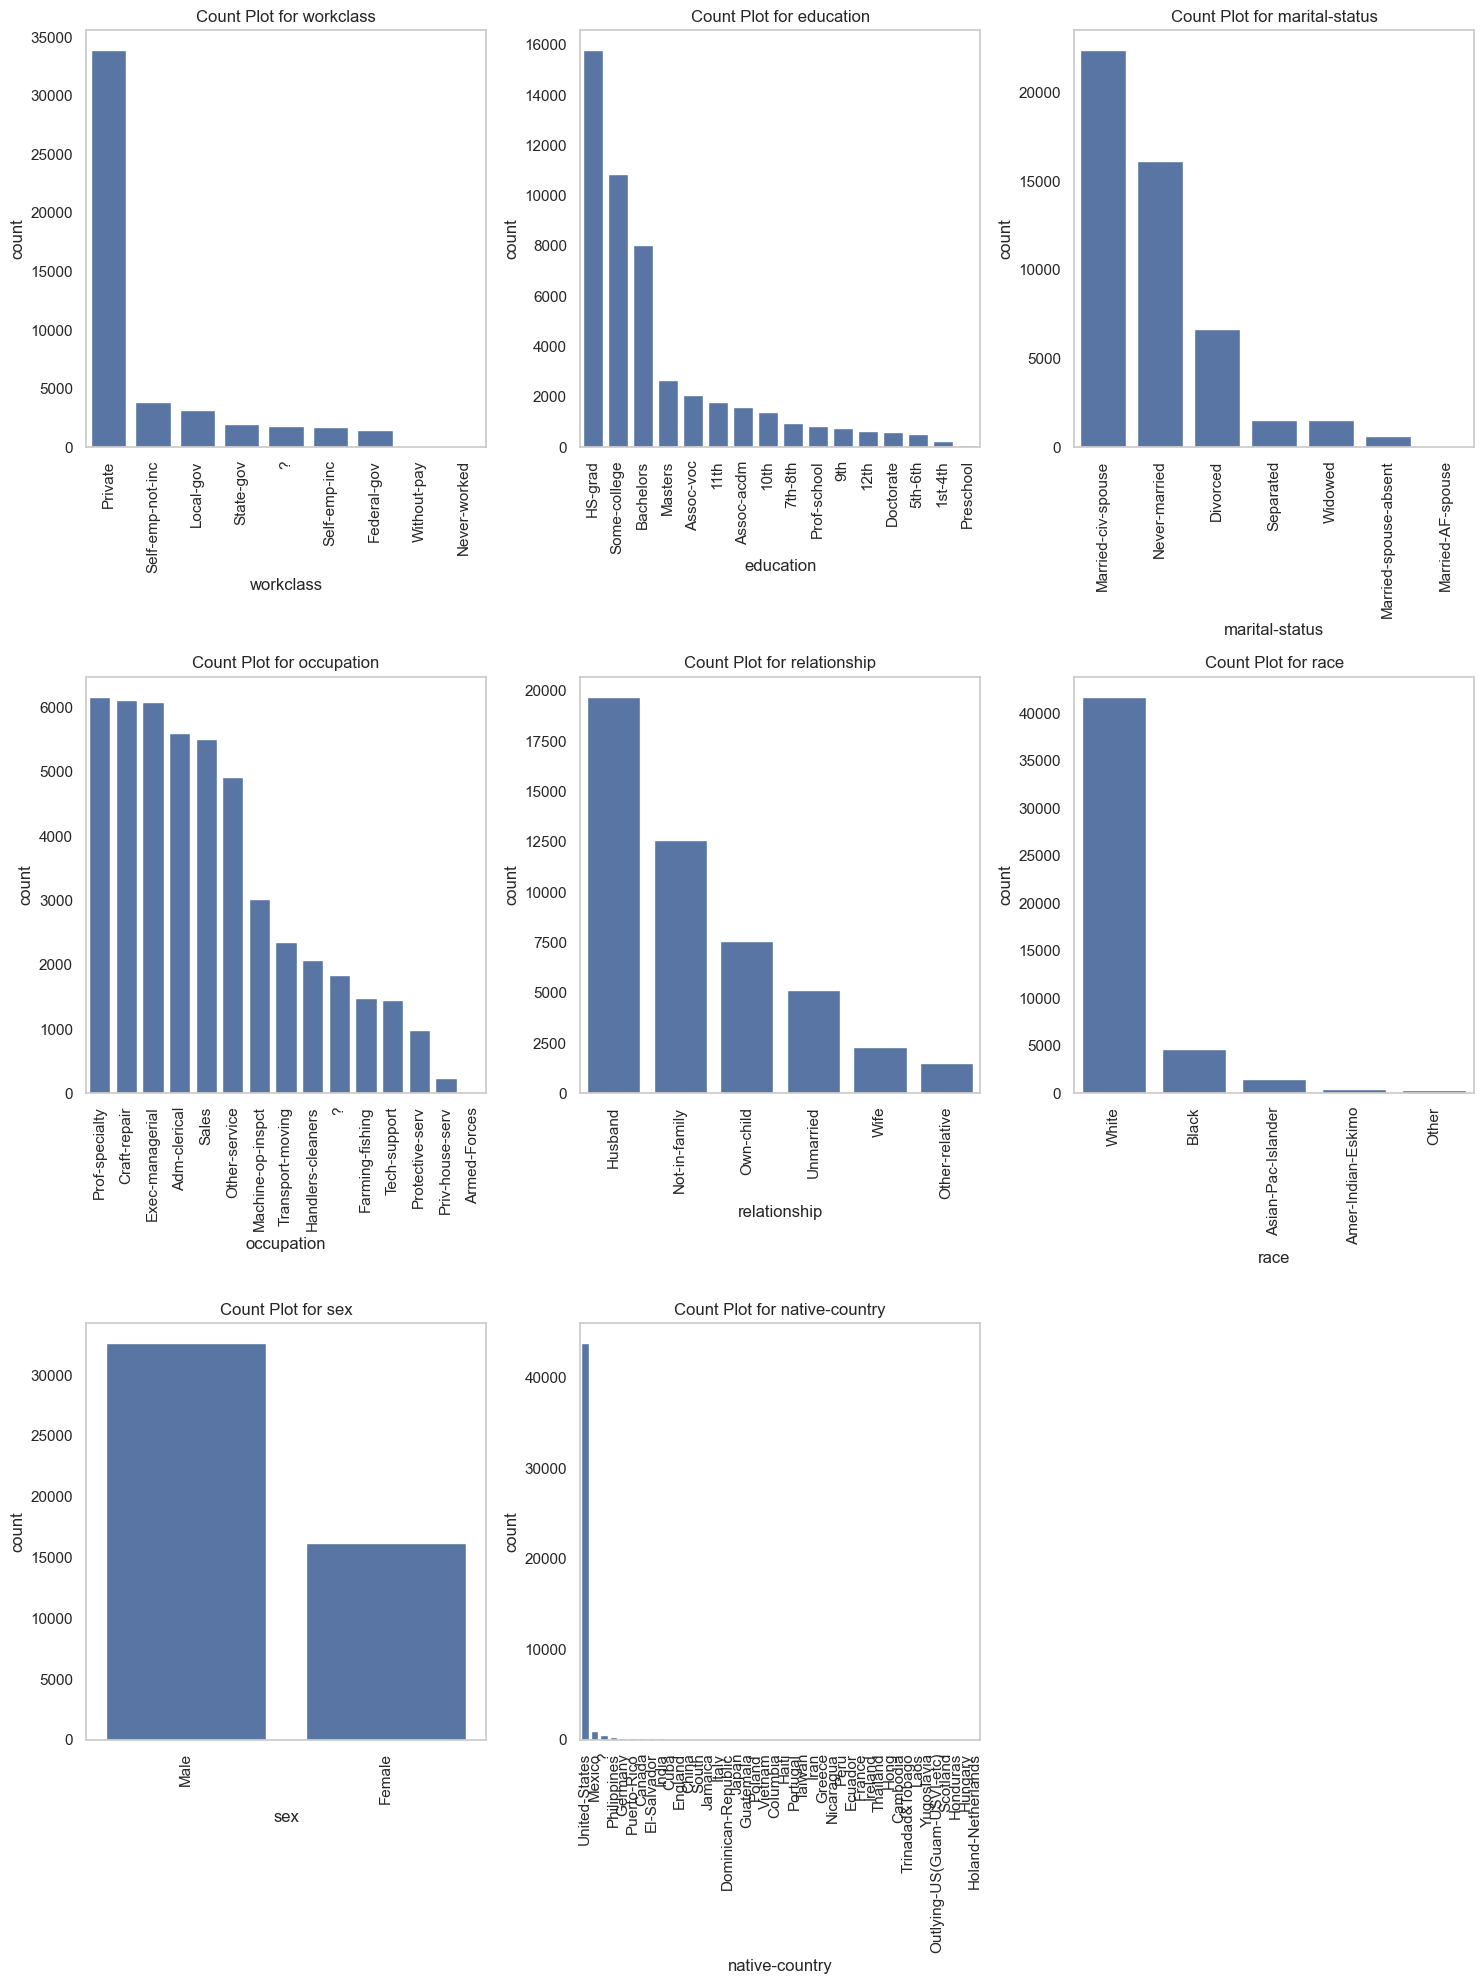

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for count plots of categorical variables
plt.figure(figsize=(15, 20))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    
    # Get the counts and sort them
    counts = X[col].value_counts().sort_values(ascending=False)
    
    # Create the count plot, sorted by frequency
    sns.countplot(data=X, x=col, order=counts.index)
    
    # Set the title and x-axis label rotation
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.grid(False) 

# Adjust layout for the plots
plt.tight_layout()
plt.show()


The plot for `native-country` is dense, and the x-axis labels are nearly unreadable. This is due to the high number of categories for this variable. Most data overwhelmingly comes from the United States. This suggests that it may be useful to reduce the number of categories, as 42 categories makes this variable too granular.

For the other variables, we can note several interesting observations:

- The modal `workclass` is `Private` showing that most people in this dataset are privately employed.
- The top 3 most common `education` categories are `HS-grad` (high school graduate), `some-college` (some college education) and `Bachelors` (a Bachelors degree), with counts of about 15000, 11000 and 8000. The rest of the categories have fewer than 3000 observations each. The least common category is `Pre-School`.
- The modal `marital-status` is `married-civ-spouse` (around 21000 observations), with `Never-married` (around 15000 observations) second. A similar trend is noted for the `relationship` variable, with around 20000 being `Husband` and 12500 being `Not-in-family`.
- The occupations seem to be roughly evenly spread within two bunches. In particular, the top 6 have around 5000 observations each, and the next 6 have around 2000 observations each.
- The modal race is `white` (over 40000 observations), followed by `black` (around 5000 observations). The remaining 3 races have very few observations each (less than 3000 total). 
- There are about twice as many males as females (30000 versus 15000).

We look at at the income. We start by viewing the classes of income.

We immediately notice the need for data cleaning. The categories "<=50K" and "<=50K." are merged below, and accordingly for ">50K".

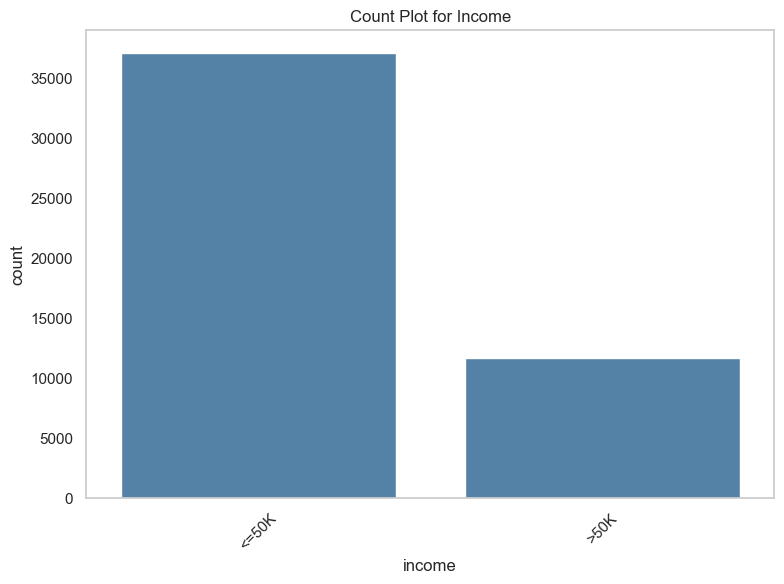

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for the count plot of the Income
plt.figure(figsize=(8, 6))
sns.countplot(data=y, x=y.columns[0], color = 'steelblue')  # Use the first column of y for plotting
plt.title("Count Plot for Income")
plt.xticks(rotation=45)
plt.grid(False)

# Show the Income plot
plt.tight_layout()
plt.show()

The data imbalance immediately becomes clear, as we see an approximate 3:1 ratio between the low and high income individuals. 

### 2.2.2 Relation with Income

We next inspect the relation between the categorical variables and the income. This is done by reproducing the count plots from before, but with an indication of the classes of income for each category.

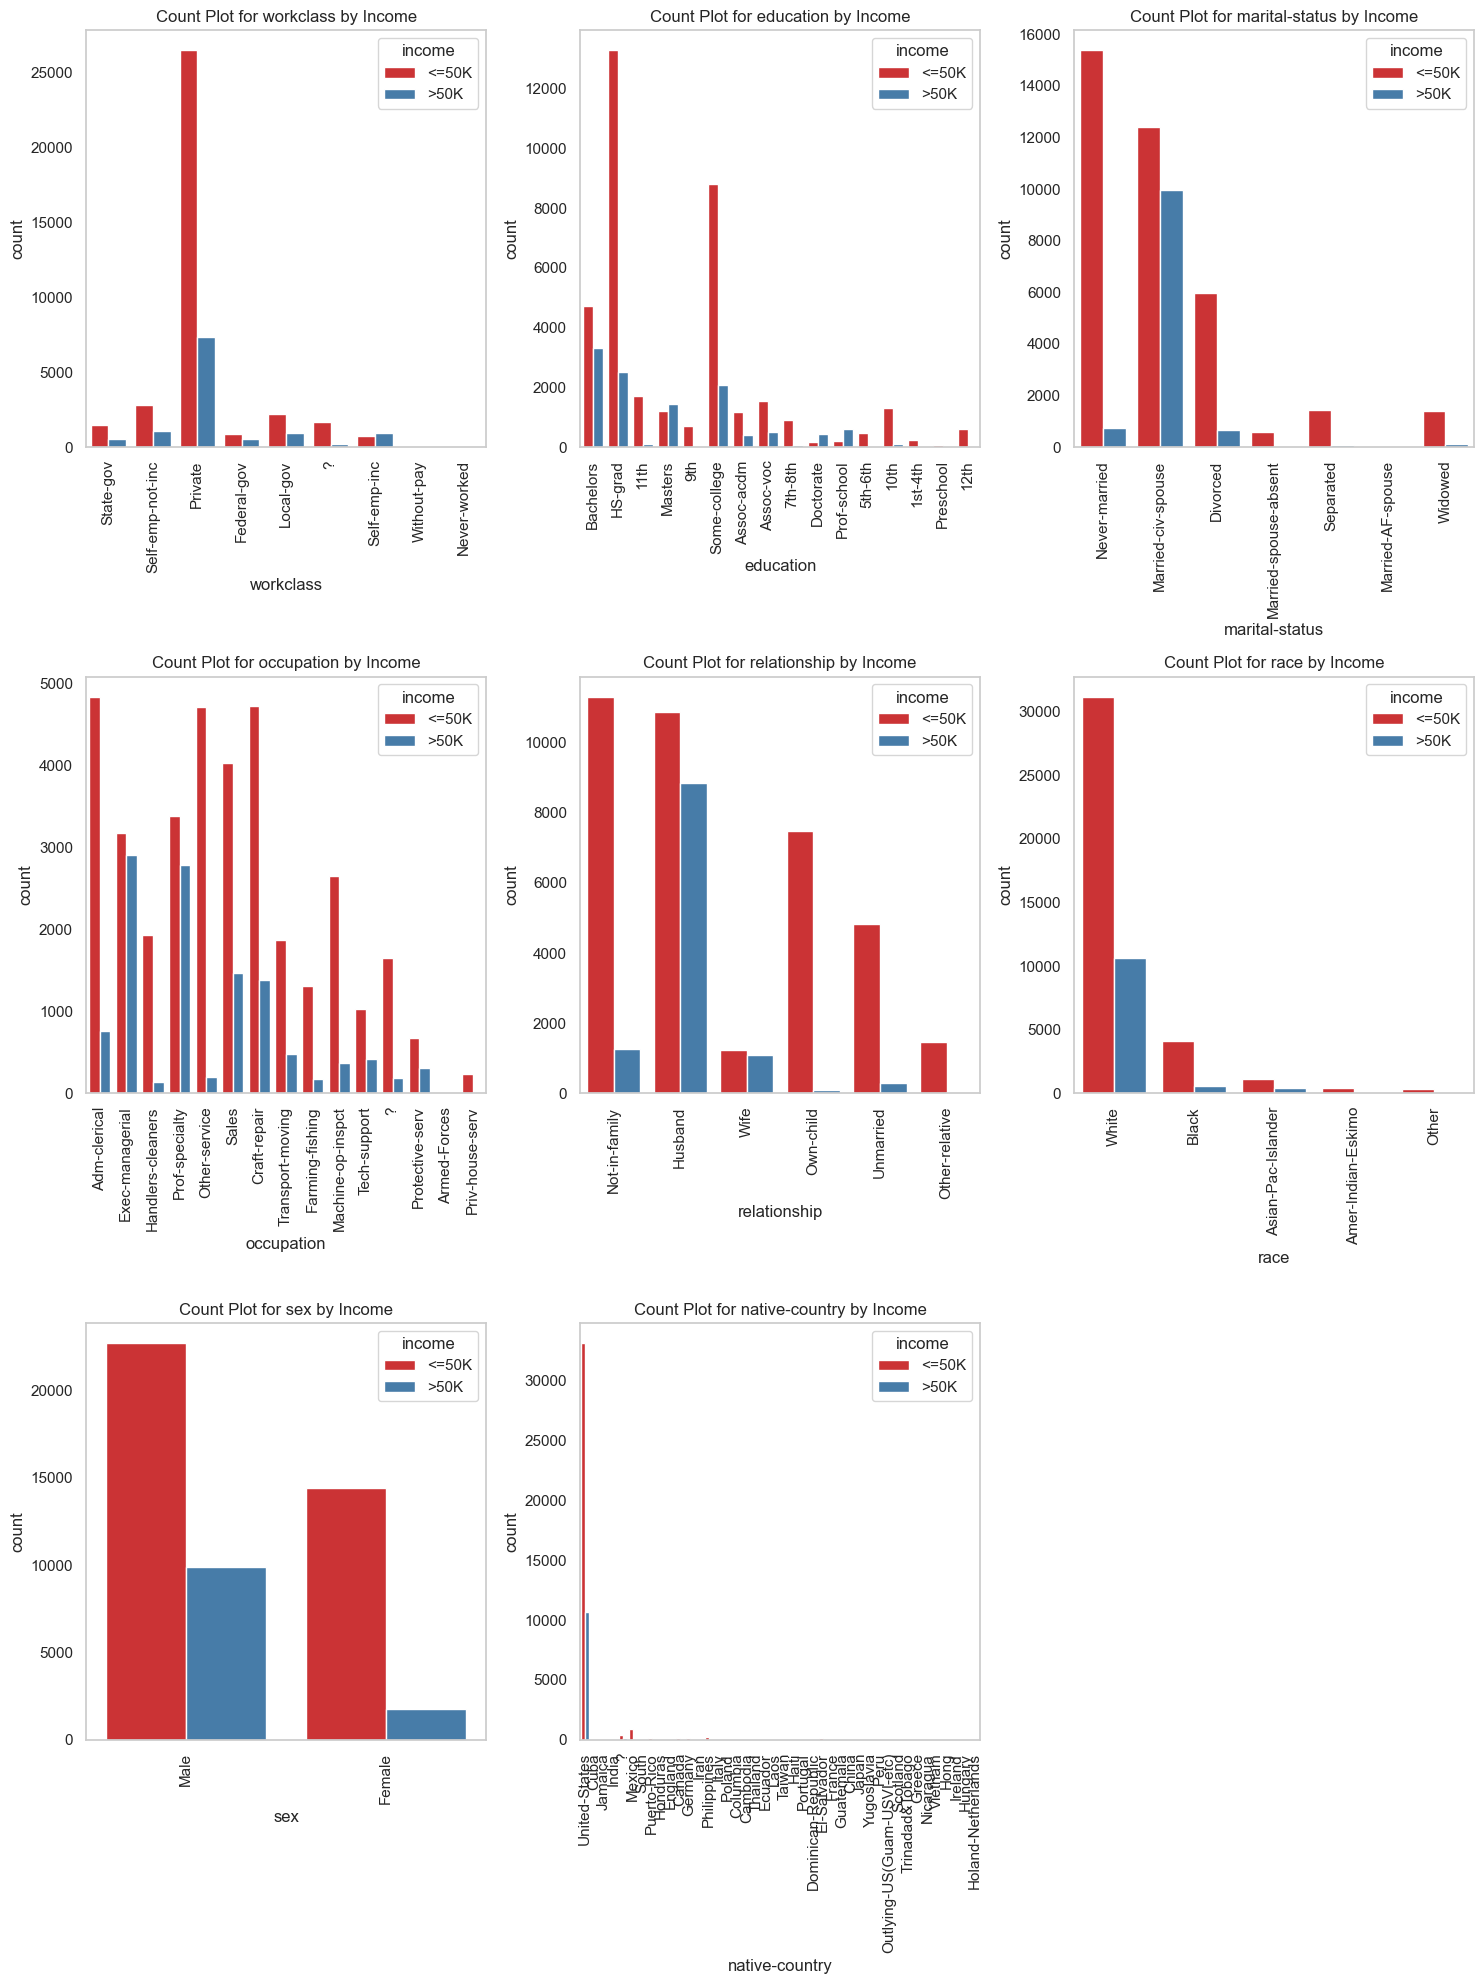

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for count plots
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=X, x=col, hue=y[y.columns[0]], palette='Set1')  # Use the Income as hue
    plt.title(f"Count Plot for {col} by Income")
    plt.xticks(rotation=90)
    plt.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()

The plot is dense in information. We summarise some of the features which stand out below. We refer to the `<50K` class as the "low income" class and the `>=50K` class at the "high income" class.

- The count distributions seem to be different for the high income and low income individuals. This is encouraging, as it shows that it will be possible to differentiate between high and low income individuals based on the features recorded in this dataset.
- The income imbalance is more severe for females with a split of 15000 low income females to about 1000 high income females, compared to around 22500 low income males to 10000 high income males.
- The missing values in the `workclass` variable are only for low income individuals.
- The modal `education` is Bachelor's for the high income individuals and `HS-grad` for low income individuals. 
- There is a striking disparity between the counts for high income `Never-married` individuals and corresponding low income individuals. This was also reflected in the counts for the `relationship` variable.
- There are no high income individuals who are `without-pay` or `Never-worked`.

This analysis gives us a good understanding of the categorical variables.


### 2.2.3. Numerical Variables

We next look at the numerical variables, inspecting measures of central tendency (mean, median) along with measures of spread (standard deviation). 

In [95]:
# Summary statistics for numerical features
print("\nSummary statistics for numerical features:\n", X.describe())


Summary statistics for numerical features:
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


We can glean useful information from this summary:
- From the `counts`, we see that no numerical variables have missing values, confirming what we have seen earlier. This is useful information as it can guide the techniques of imputation used to deal with missing data (see Section **DID YOU DO THIS**??). 
- The ages range from 17 to 90, with a positive skew as we can see that the third quartile is 48 but the maximum is 90, indicating a long right tail in the distribution. 
- The `fnlwgt` seems to have a high maximum of about 1.5 million, which is much higher than the mean and median, which are both around 200000.
- The education levels range from 1 to 16. The middle 50% of values are in the range 9 to 12.
- The `capital-gain` and `capital-loss` are strongly positively skewed. They have minima at 0, and maxima at 99999 and 4356 respectively. The third quantile being 0 indicates that at least 75% of values are below 0.
- The hours worked per week range from 1 to 99, with the middle 50% lying between 40 and 45 hours. The first quartile and median both being 40 indicate that at least 25% of the `hours-per-week` recorded in this dataset are 40.

It is useful to visualise this using graphical plots. We do this below.

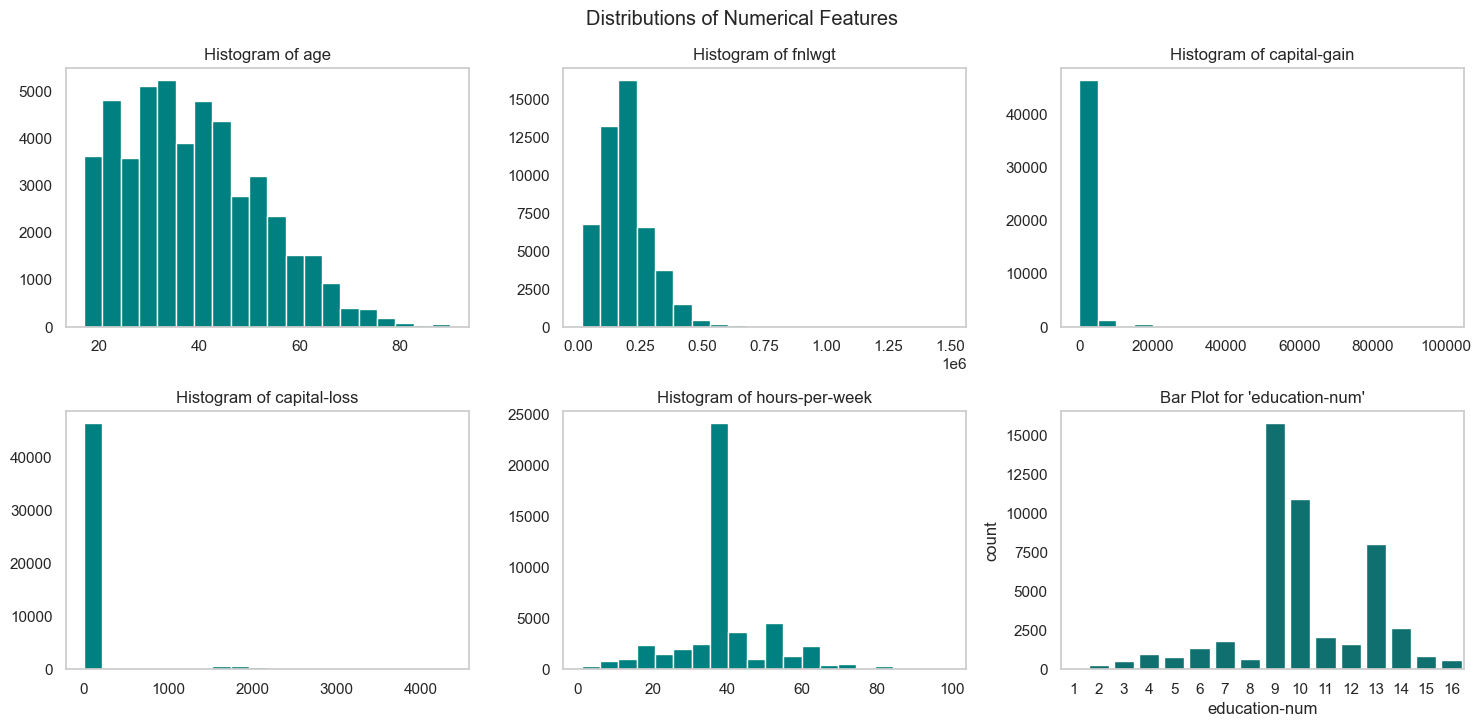

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Plot histograms for all numerical columns except 'education-num'
for i, col in enumerate([col for col in numerical_columns if col != 'education-num'], 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns
    X[col].hist(bins=20, color='teal', grid=False)
    plt.title(f"Histogram of {col}")
    
# Bar plot for 'education-num'
plt.subplot(3, 3, len([col for col in numerical_columns if col != 'education-num']) + 1)  # Next available position
sns.countplot(data=X, x='education-num', color='teal')
plt.title("Bar Plot for 'education-num'")
plt.grid(False)

# Adjust layout
plt.tight_layout()
plt.suptitle("Distributions of Numerical Features", y=1.02)  # Adjust title position
plt.show()

The visualisations confirm what we have seen from the summary. For example, we do observe a right tail in the distribution of `age` and `fnlwgt`. We can also see the modes:

- The `capital-gain` and `capital-loss` have modes at 0. In fact, for these variables, most values are 0.
- The hours worked per week has a mode at 40.
- The `education_num` has a mode at 9.

The `education_num` is an encoding of the categorical variable `education`. This is clarified in the code below, where we see that the highest level of education is encoded as 16, and the lowest level of education is encoded as 1. This allows us to treat education as an **ordered factor**.

In [97]:
# Count the number of unique values in 'education-num'
education_num_counts = X['education-num'].value_counts()

# Count the number of unique values in 'education'
education_counts = X['education'].value_counts()

# Display the results
print("Count of each value in 'education-num':\n", education_num_counts)
print("\nCount of each value in 'education':\n", education_counts)

Count of each value in 'education-num':
 education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

Count of each value in 'education':
 education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


To better visualise the distribution of the `capital-gain` and `capital-loss`, we use a log transform. This is done since there is a strong positive skew. We apply the transformation $x \mapsto \log_{10}(x+1)$ as many values are 0.

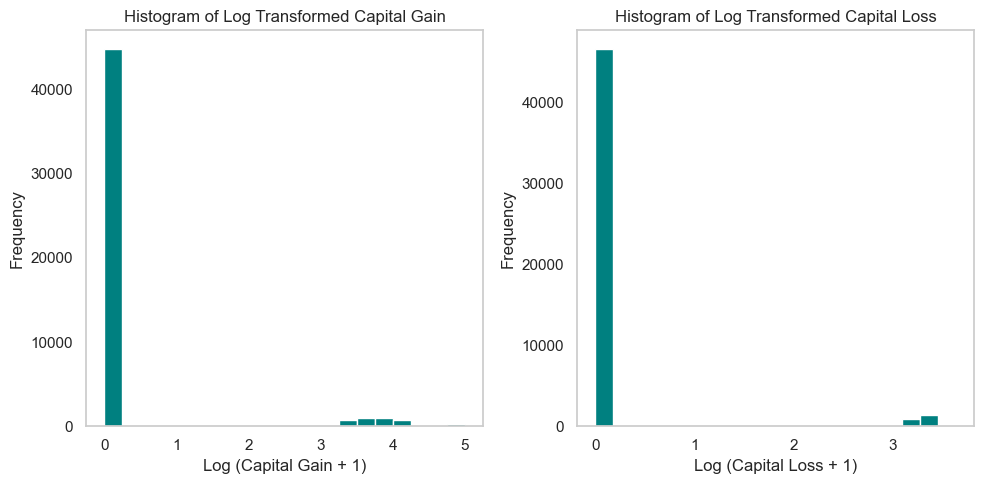

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Create copies of capital-gain and capital-loss for log base 10 transformation
log_capital_gain_base10 = np.log10(X['capital-gain'] + 1)
log_capital_loss_base10 = np.log10(X['capital-loss'] + 1)

# Set up the figure for subplots
plt.figure(figsize=(10, 5))

# Histogram for log base 10 transformed capital-gain
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(log_capital_gain_base10, bins=20, color='teal')
plt.grid(False)
plt.title("Histogram of Log Transformed Capital Gain")
plt.xlabel("Log (Capital Gain + 1)")
plt.ylabel("Frequency")

# Histogram for log base 10 transformed capital-loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(log_capital_loss_base10, bins=20, color='teal')
plt.grid(False)
plt.title("Histogram of Log Transformed Capital Loss")
plt.xlabel("Log (Capital Loss + 1)")
plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

This did not help much in elucidating further insights. We can only see that there is an overwhelmingly high number of observations with value 0. We therefore look at the distributions for high income and low income individuals separately. 

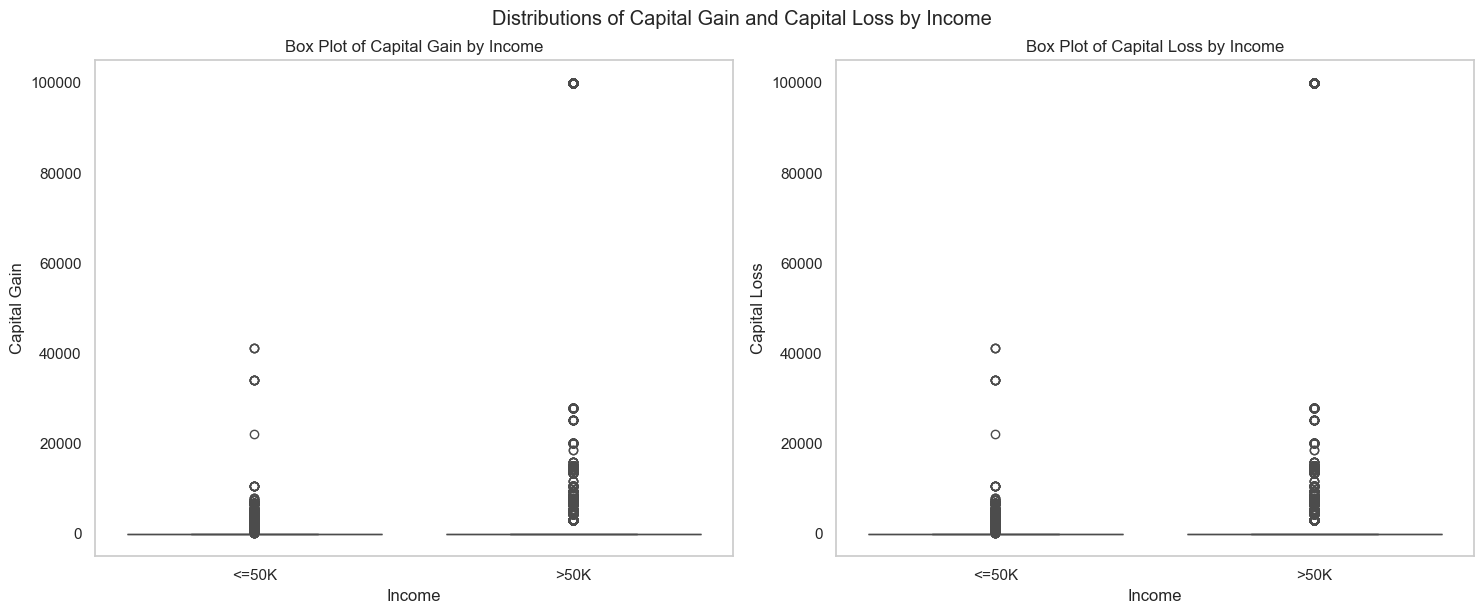

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure to set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Set up the figure for subplots
plt.figure(figsize=(15, 6))

# Box plot for 'capital-gain'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(data=X, x=y[y.columns[0]], y='capital-gain', hue=y[y.columns[0]],  legend=False)
plt.title("Box Plot of Capital Gain by Income")
plt.xlabel("Income")
plt.ylabel("Capital Gain")
plt.grid(False)

# Box plot for 'capital-loss'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(data=X, x=y[y.columns[0]], y='capital-gain', hue=y[y.columns[0]],  legend=False)
plt.title("Box Plot of Capital Loss by Income")
plt.xlabel("Income")
plt.ylabel("Capital Loss")
plt.grid(False)

# Adjust layout
plt.tight_layout()
plt.suptitle("Distributions of Capital Gain and Capital Loss by Income", y=1.02)  # Adjust title position
plt.show()


This was still not satisfactory, so we ignored the zero values. This is shown below.

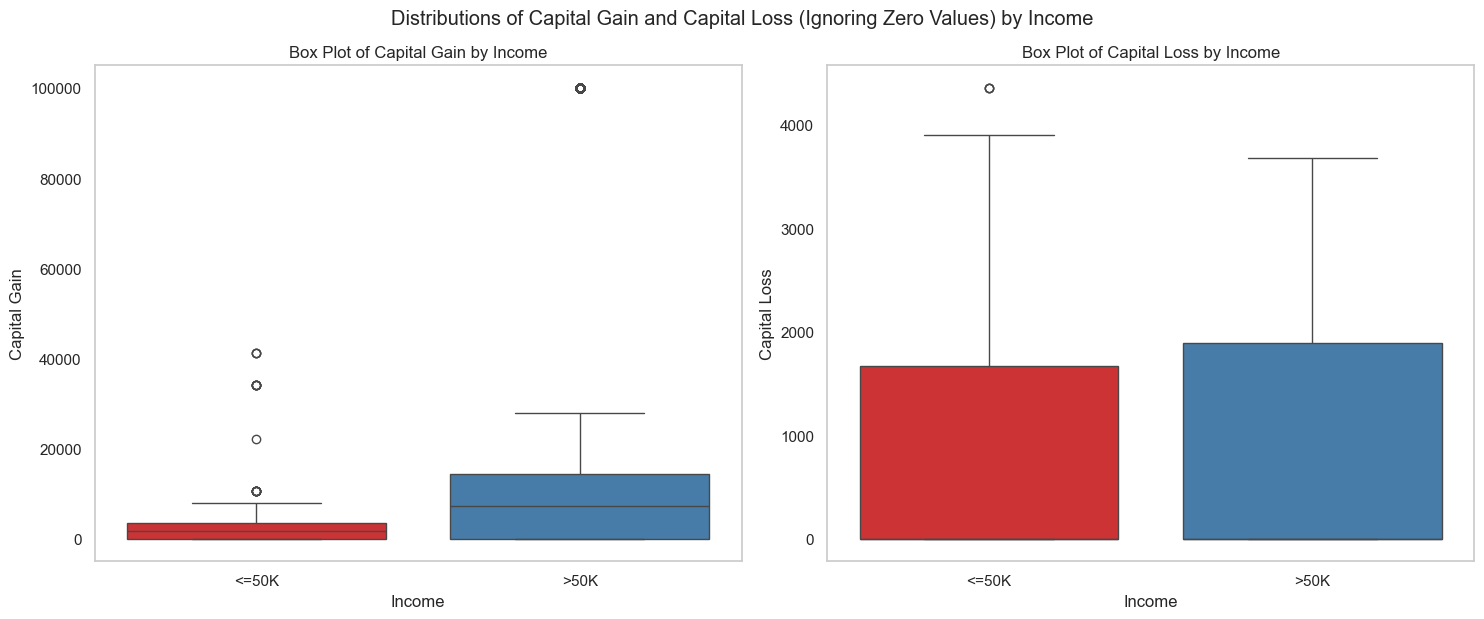

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where 'capital-gain' or 'capital-loss' is 0
X_filtered = X[(X['capital-gain'] > 0) | (X['capital-loss'] > 0)]

# Ensure to set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Set up the figure for subplots
plt.figure(figsize=(15, 6))

# Box plot for 'capital-gain'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(data=X_filtered, x=y[y.columns[0]], y='capital-gain', hue=y[y.columns[0]], palette='Set1', legend=False)
plt.title("Box Plot of Capital Gain by Income")
plt.xlabel("Income")
plt.ylabel("Capital Gain")
plt.grid(False)

# Box plot for 'capital-loss'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(data=X_filtered, x=y[y.columns[0]], y='capital-loss', hue=y[y.columns[0]], palette='Set1', legend=False)
plt.title("Box Plot of Capital Loss by Income")
plt.xlabel("Income")
plt.ylabel("Capital Loss")
plt.grid(False)

# Adjust layout to make space for suptitle and avoid overlap
plt.tight_layout()  # Adjust layout to prevent overlap
plt.suptitle("Distributions of Capital Gain and Capital Loss (Ignoring Zero Values) by Income", y=1.03)  # Adjust title position

plt.show()

This allowed us to see that the positive capital gains are higher on average for the high income individuals, with several outliers at very high values. The upper quartiles for the capital losses were similar, but the maximum loss was slightly higher for the low income individuals. At a glance, we can see a more significant difference in distributions for capital gain, suggesting that using that variable can more easily help distinguish between low and high income individuals.

We next look at a correlation plot.

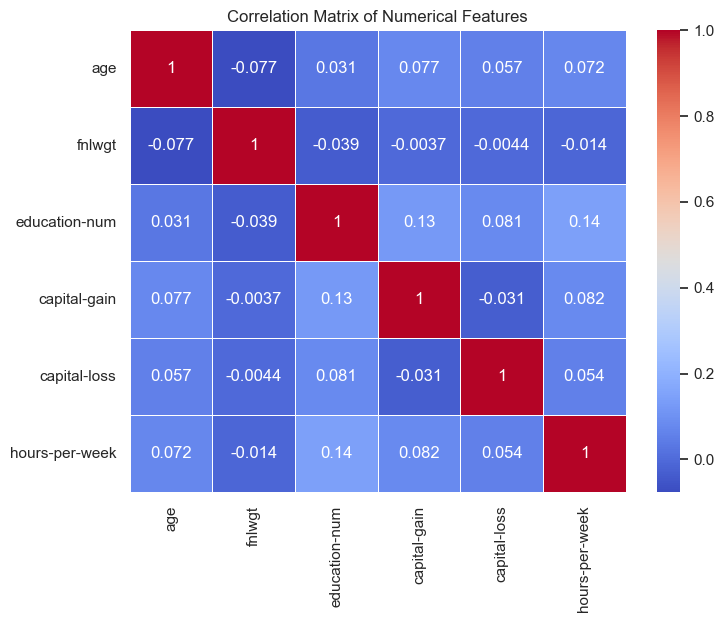

In [101]:
# Selecting numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix of numerical variables
corr_matrix = X[numerical_columns].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

We see that there are weak correlations between the variables as they are all less than 0.15 in magnitude. This is encouraging, as it means that multicollinearity will not be a problem. Recall that multicollinearity leads to problems such as high variance of parameter estimates. The interested reader may consult this paper [3] on [Multicollinearity and Regression Analysis](https://iopscience.iop.org/article/10.1088/1742-6596/949/1/012009/pdf) to find experiments where multicollinearity led to high variance for estimates.

### 2.2.4. Relationships with Income

We use box plots to visualise the numerical variables according to the income. This is shown in the plot below. We omit `capital-gains` and `capital-loss` as they contained too many zeroes to do a visually meaningful plot.


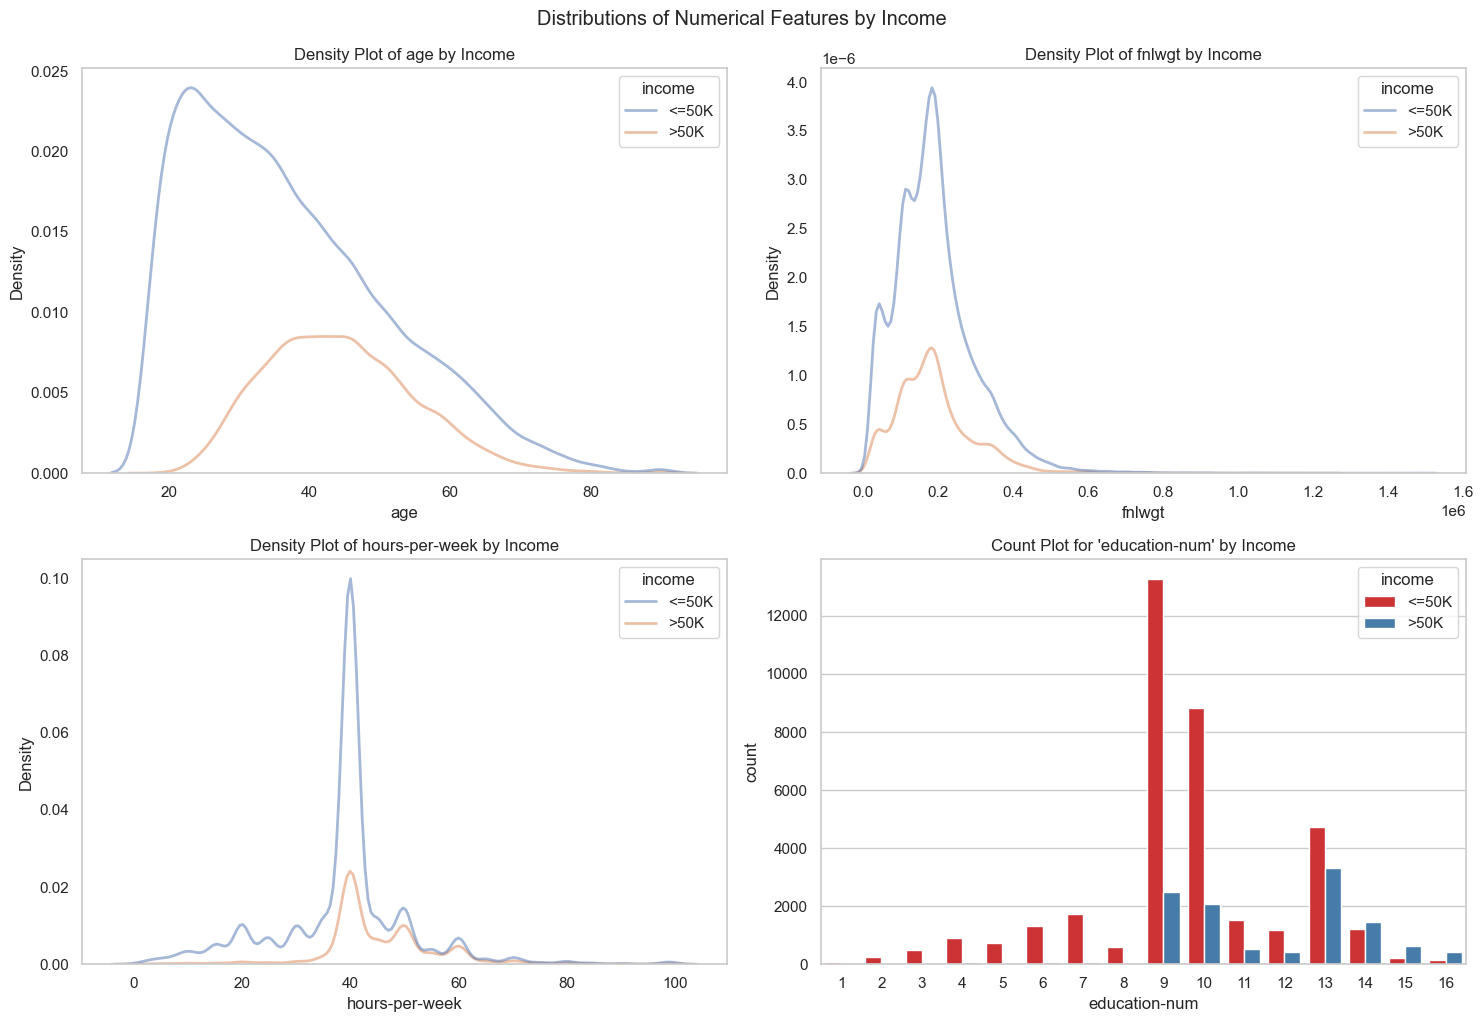

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'capital-gain', 'capital-loss', and 'education-num'
numerical_columns = [col for col in numerical_columns if col not in ['capital-gain', 'capital-loss', 'education-num']]

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Plot density plots for the first three numerical columns
for i, col in enumerate(numerical_columns[:3], 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.kdeplot(data=X, x=col, hue=y[y.columns[0]], fill=False, color='black', linewidth=2, alpha=0.5)
    plt.title(f"Density Plot of {col} by Income")
    plt.xlabel(col)
    plt.grid(False)
    plt.ylabel("Density")

# Count plot for 'education-num' with hue
plt.subplot(2, 2, len(numerical_columns[:3]) + 1)  # Next available position
sns.countplot(data=X, x='education-num', hue=y[y.columns[0]], palette='Set1')
plt.title("Count Plot for 'education-num' by Income")

# Adjust layout
plt.tight_layout()
plt.suptitle("Distributions of Numerical Features by Income", y=1.02)  # Adjust title position
plt.show()


An immediately striking feature is that there are no high income individuals with `education-num` less than 9. Also, the modal `education-num` is 13 for high income individuals, but 9 for low income individuals. The ages for high income individuals seem to be higher than those for low income individuals.

### 2.2.5. Links between Categorical and Numerical Variables

We will conclude our EDA by looking at the links between categorical and numerical variables. The plot produced below will be very dense, but we will provide a brief summary following the plot. We will omit some variables to make it easier to interpret.

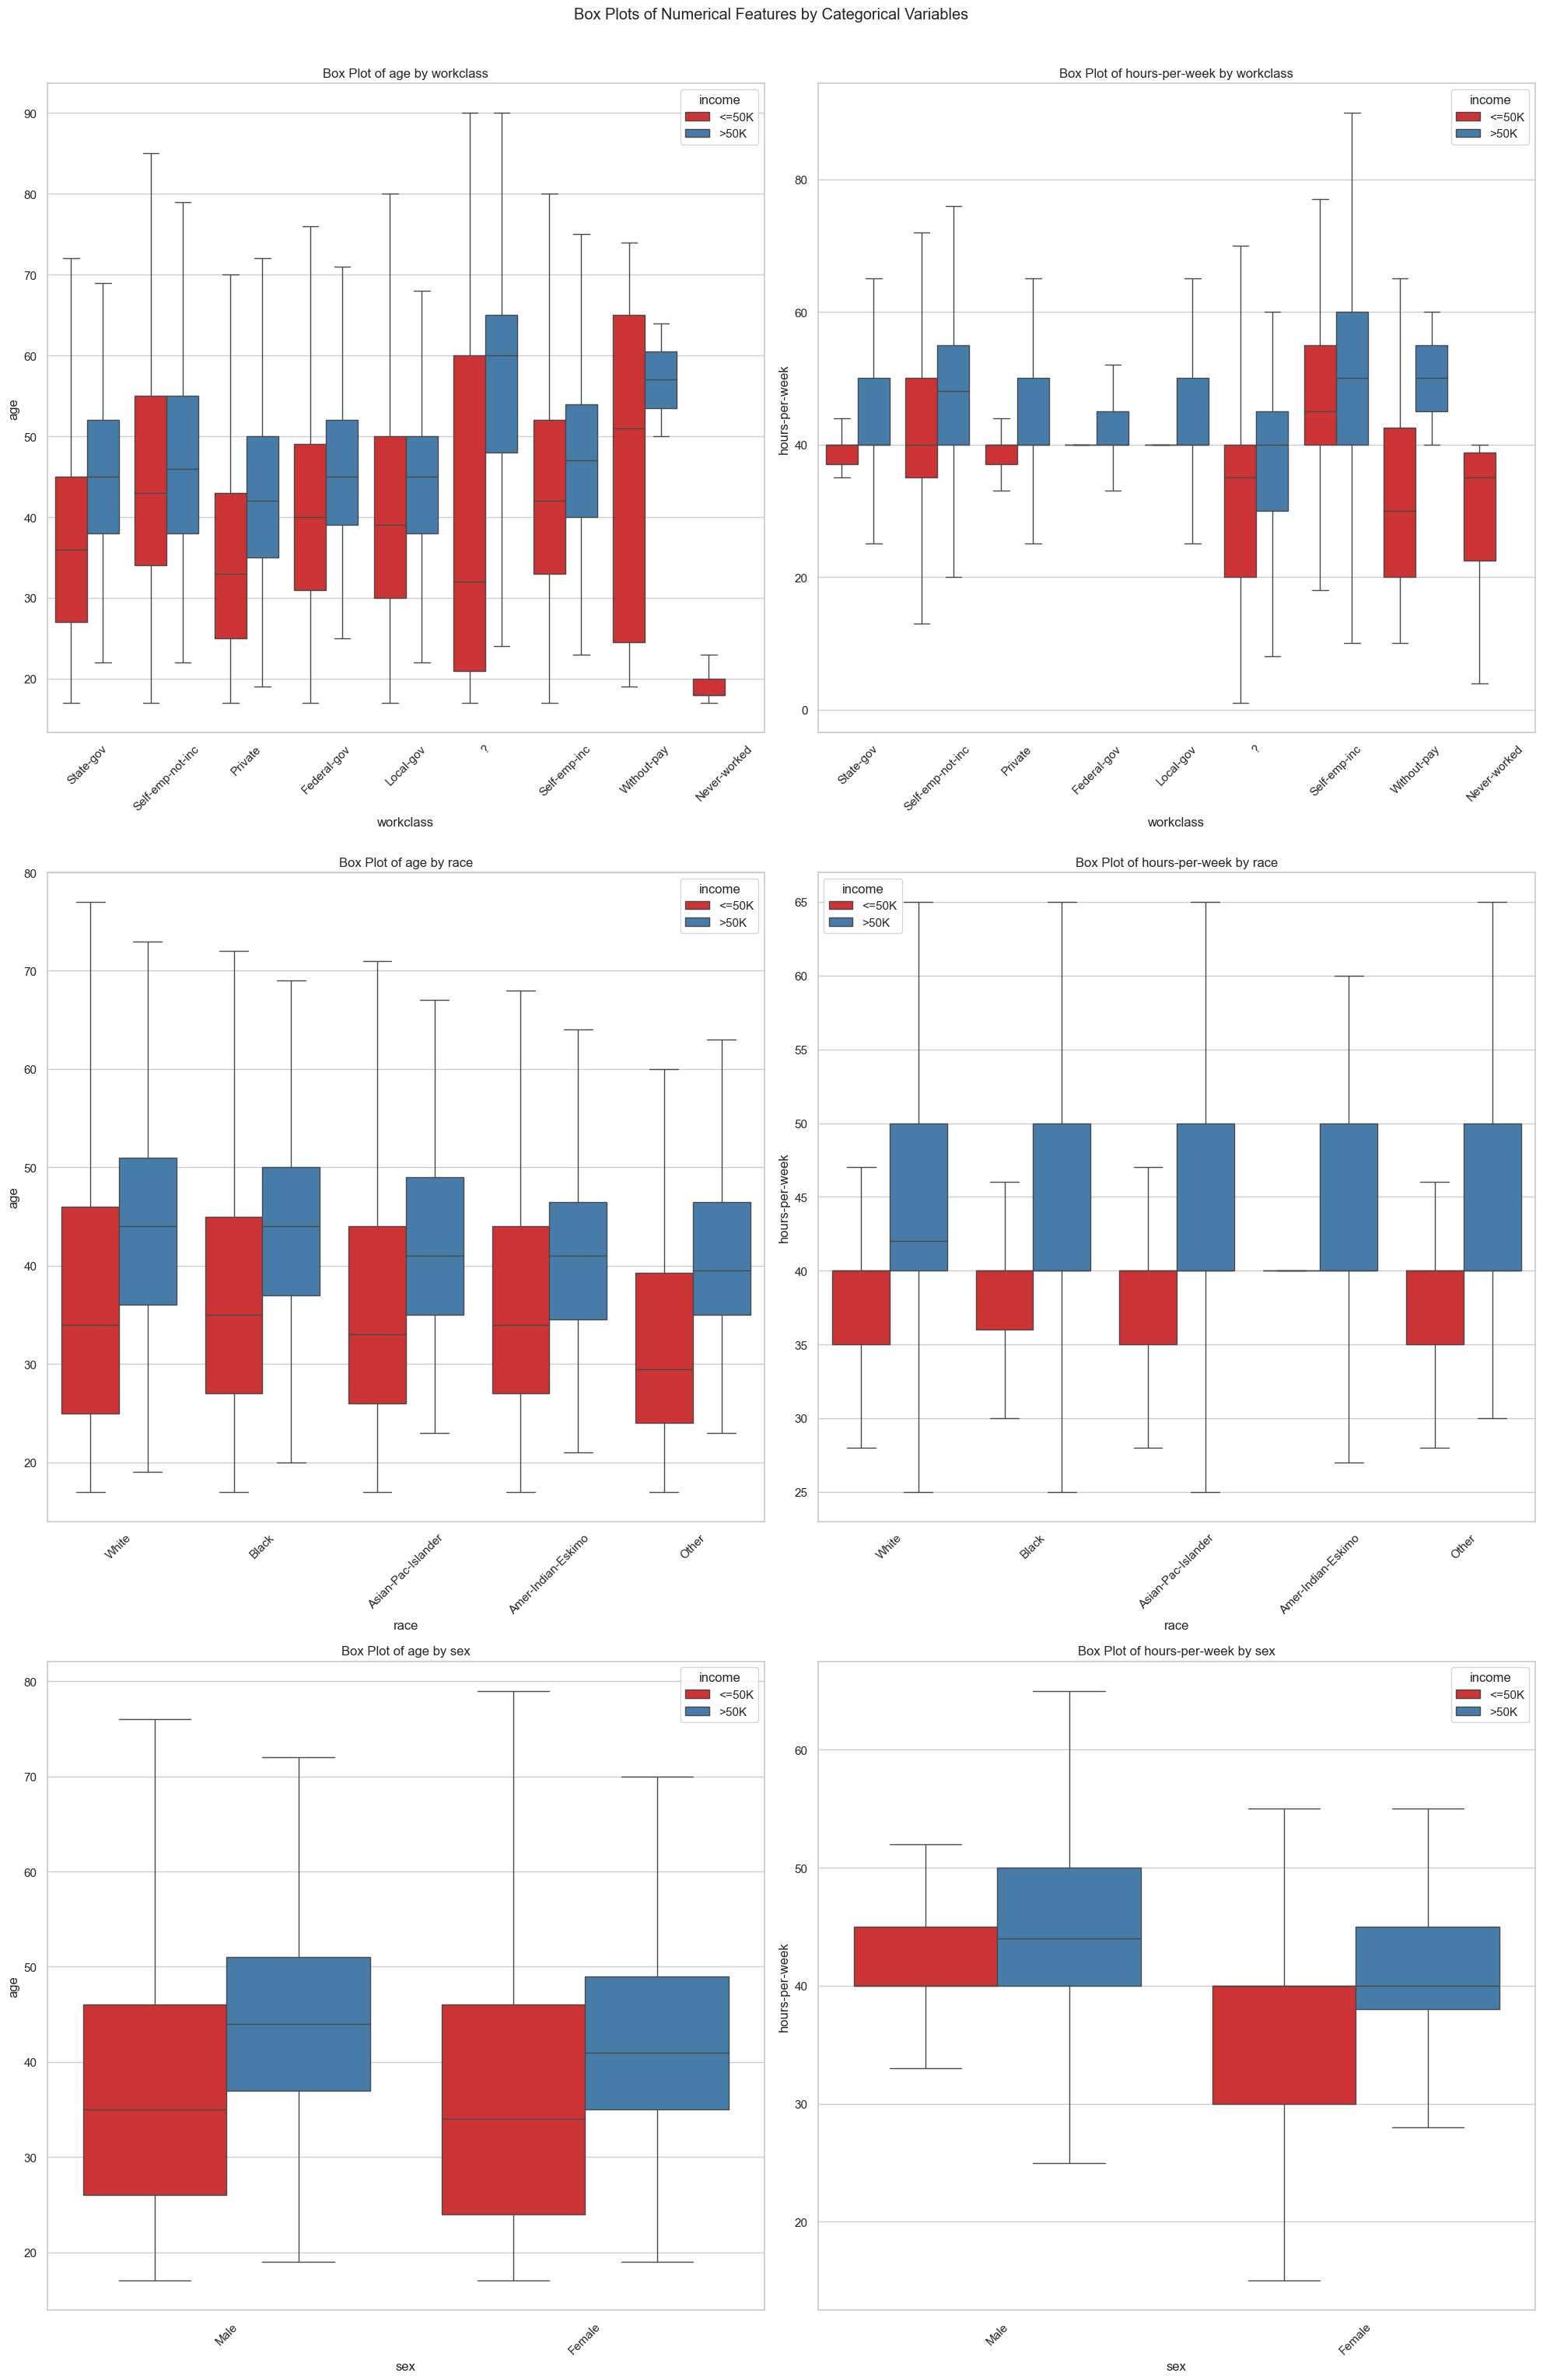

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical_columns = [
    'workclass', 'race', 'sex'  # Removed 'native-country', 'education', 'marital-status', 'occupation', 'relationship'
]

# Selecting numerical columns and removing 'capital-gain', 'capital-loss', and 'fnlwgt'
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'capital-gain', 'capital-loss', and 'fnlwgt'
numerical_columns = [col for col in numerical_columns if col not in ['capital-gain', 'capital-loss', 'education-num', 'fnlwgt']]

# Set up the figure for subplots
plt.figure(figsize=(20, 30))

# Create box plots for numerical columns against each categorical variable
for i, cat_col in enumerate(categorical_columns, 1):
    for j, num_col in enumerate(numerical_columns):
        plt.subplot(len(categorical_columns), len(numerical_columns), (i-1)*len(numerical_columns) + j + 1)
        sns.boxplot(data=X, x=cat_col, y=num_col, hue=y[y.columns[0]], palette='Set1', showfliers=False)
        plt.title(f"Box Plot of {num_col} by {cat_col}")
        plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.suptitle("Box Plots of Numerical Features by Categorical Variables", y=1.02)  # Adjust title position
plt.show()

We can conclude the following.
- The ages across workclass are different for low income individuals. For instance, there are many low income individuals with missing workclass and without pay, but relatively fewer high income individuals in those categories.
- For all races, the ages of high income individuals is higher than that for low income individuals.
- High income individuals, regardless of sex, have a higher median age and hours worked per week than low income individuals. The same was observed was considering race.

This further elucidates the relationship between the features and income. We can see strong evidence that using these features can help in predicting income.

# 3. Conclusion
## 3.1 Summary of Findings
In this notebook, we performed extensive EDA on the Adult Income dataset [1].  This revealed many interesting features, such as a class imbalance and the presence of missing data in some categorical covariates. We have found that the variables in this dataset have different characteristics for high income and low income individuals and therefore will be useful in predicting the income. We highlight a few of our findings below:

- There is informative missingness in the data. In particular, most missing values are those for low income indiviudals.
- There is data imbalance, with 3 times as many low income individuals as high income individuals.
- The numerical variables have weak correlations with each other, showing that multicollinearity is not a problem.
- The categorical variable `native-country` is too granular with most observations being from the US. It would help to reduce the number of categories in it.
- The majority race is `white`, with over 40000 observations. The dataset contains twice as many males as females.


## 3.2. Questions to be Answered
This can help us in formulating several questions:
- How does the proportion of high income individuals vary by sex?
- How does the proportion of high income individuals vary by race?

At an in-person group meeting, we decided to analyse the first question. The `race` variable contained categories with very few observations in them, which would pose a challenge upon doing a test/train split.

The next documents investigate how several models to tackle our chosen question.

# References

[1] Becker, B. & Kohavi, R. (1996). Adult [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

[2] 1994 Census data. https://www.census.gov/programs-surveys/ahs/data/1994.html

[3] Daoud, Jamal I. "Multicollinearity and regression analysis." Journal of Physics: Conference Series. Vol. 949. No. 1. IOP Publishing, 2017.

[4] Notebook on Categorical Data Analysis. https://www.kaggle.com/code/tsilveira/applying-heatmaps-for-categorical-data-analysis: This was helpful in guiding the analysis of the categorical variables and to structure this analysis.